In [30]:
import torch
import matplotlib.pyplot as plt
from elfragmentador.nn_encoding import ConcatenationEncoder
from elfragmentador.model import PepTransformerModel

try:
    model = PepTransformerModel.load_from_checkpoint('/home/jspaezp/Downloads/0.50.0a5_onecycle_5e_C_val_l=0.038469_epoch=004.ckpt')
except RuntimeError as e:
    print(e)
    saved_ckpt = torch.load('/home/jspaezp/Downloads/0.50.0a5_onecycle_5e_C_val_l=0.038469_epoch=004.ckpt', map_location="cpu")
    state_dict = saved_ckpt['state_dict']
    state_dict.pop("decoder.peak_decoder.layers.1.weight")
    state_dict.pop("decoder.peak_decoder.layers.1.bias")
    model = PepTransformerModel(**saved_ckpt['hyper_parameters'])
    model.load_state_dict(state_dict=state_dict, strict=False)
    print(model)

model.eval()


ERROR:root:'RTFFN' not found, please provide to the trainable sections one of {_model_sections}
ERROR:root:'RTFFN' not found, please provide to the trainable sections one of {_model_sections}


Error(s) in loading state_dict for PepTransformerModel:
	Missing key(s) in state_dict: "irt_decoder.multihead_attn.in_proj_weight", "irt_decoder.multihead_attn.in_proj_bias", "irt_decoder.multihead_attn.out_proj.weight", "irt_decoder.multihead_attn.out_proj.bias", "irt_decoder.targets.weight", "irt_decoder.out_mlp.layers.0.weight", "irt_decoder.out_mlp.layers.0.bias", "irt_decoder.out_mlp.layers.1.weight", "irt_decoder.out_mlp.layers.1.bias", "irt_decoder.out_mlp.layers.2.weight", "irt_decoder.out_mlp.layers.2.bias". 
	Unexpected key(s) in state_dict: "rt_decoder.self_attn.in_proj_weight", "rt_decoder.self_attn.in_proj_bias", "rt_decoder.self_attn.out_proj.weight", "rt_decoder.self_attn.out_proj.bias", "rt_decoder.multihead_attn.in_proj_weight", "rt_decoder.multihead_attn.in_proj_bias", "rt_decoder.multihead_attn.out_proj.weight", "rt_decoder.multihead_attn.out_proj.bias", "rt_decoder.linear1.weight", "rt_decoder.linear1.bias", "rt_decoder.linear2.weight", "rt_decoder.linear2.bias", "r

PepTransformerModel(
  (encoder): _PeptideTransformerEncoder(
    (aa_encoder): AASequenceEmbedding(
      (fw_position_embed): SeqPositionalEmbed()
      (rev_position_embed): SeqPositionalEmbed()
      (aa_encoder): Embedding(24, 108, padding_idx=0)
      (mod_encoder): Embedding(15, 108, padding_idx=0)
    )
    (transformer_encoder): TransformerEncoder(
      (layers): ModuleList(
        (0): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=120, out_features=120, bias=True)
          )
          (linear1): Linear(in_features=120, out_features=354, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=354, out_features=120, bias=True)
          (norm1): LayerNorm((120,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((120,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2)

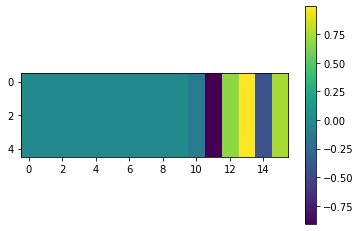

In [31]:
x1 = torch.zeros((5, 1, 10))
x2 = torch.cat([x1, x1+1], axis = 1)
encoder = model.decoder.nce_encoder
output = encoder(x1, torch.tensor([[25]]))

plt.imshow(output[:,0,:])
plt.colorbar()

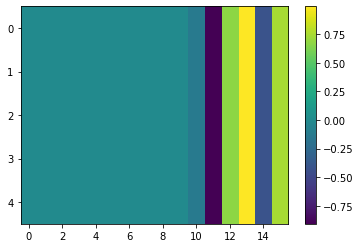

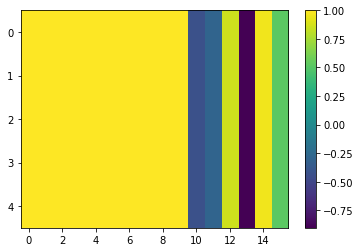

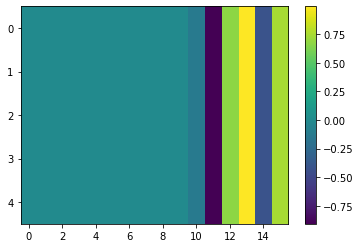

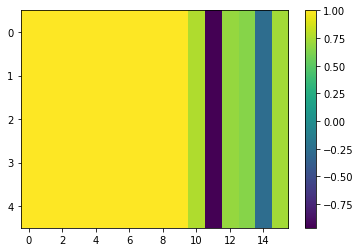

In [32]:
output = encoder(x2, torch.tensor([[25], [35]]))
plt.imshow(output[:,0,:], aspect="auto")
plt.colorbar()
plt.show()
plt.imshow(output[:,1,:], aspect="auto")
plt.colorbar()
plt.show()

output = encoder(x2, torch.tensor([[25], [26]]))
plt.imshow(output[:,0,:], aspect="auto")
plt.colorbar()
plt.show()
plt.imshow(output[:,1,:], aspect="auto")
plt.colorbar()
plt.show()

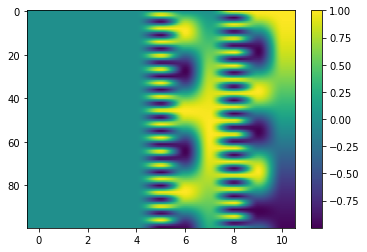

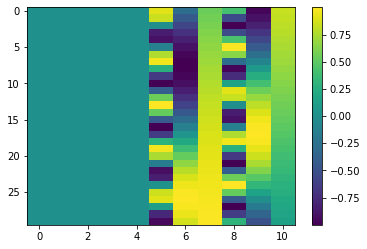

In [36]:
x1 = torch.zeros((1, 100, 5))
in_vals = torch.tensor([[x] for x in range(100)])
output = encoder(x1, in_vals)

plt.imshow(output[0,:,:], aspect = "auto")
plt.colorbar()
plt.show()

x1 = torch.zeros((1, 30, 5))
in_vals = torch.tensor([[x] for x in range(20, 50)])
output = encoder(x1, in_vals)

plt.imshow(output[0,:,:], aspect = "auto")
plt.colorbar()
plt.show()

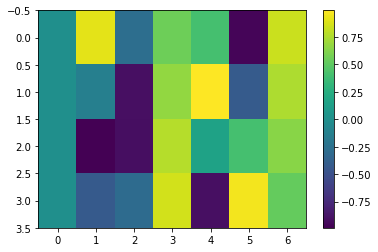

In [37]:
x1 = torch.zeros((1, 4, 1))
in_vals = torch.tensor([[20],[25],[30],[35]])
output = encoder(x1, in_vals)

plt.imshow(output[0,:,:], aspect = "auto")
plt.colorbar()
plt.show()

SeqPositionalEmbed()


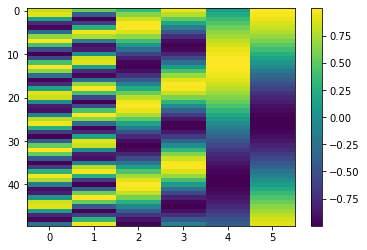

In [41]:
posencoder = model.encoder.aa_encoder.fw_position_embed
print(posencoder)
x = torch.ones((50, 50)).float()
output = posencoder(x)

plt.imshow(output[:,0,:], aspect = "auto")
plt.colorbar()
plt.show()

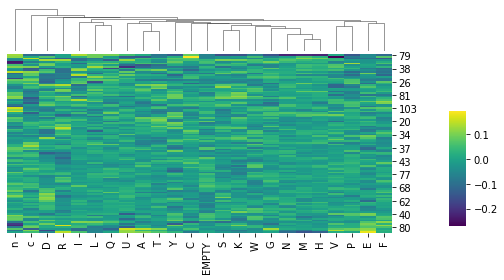

In [64]:
import elfragmentador.constants as EFC
import pandas as pd
import seaborn as sns

df = pd.DataFrame(data = model.encoder.aa_encoder.aa_encoder.weight.detach().numpy().T)
df.columns = ['EMPTY'] + list(EFC.AMINO_ACID)

df
g = sns.clustermap(df, cmap="viridis", dendrogram_ratio=(0.02, 0.2), figsize=(8,4))
g.ax_row_dendrogram.set_visible(False)
g.fig.subplots_adjust(right=0.7)
g.ax_cbar.set_position((0.8, .2, .03, .4))



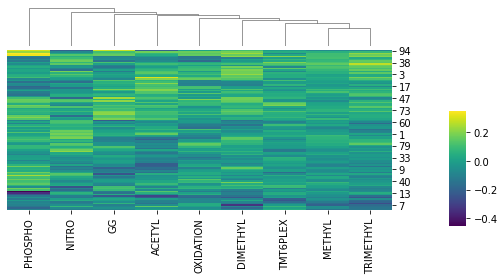

In [68]:

df = pd.DataFrame(data = model.encoder.aa_encoder.mod_encoder.weight.detach().numpy().T)
df.columns = ['EMPTY'] + list(EFC.MODIFICATION)

for x in df:
    if sum(df[x]**2) < 0.01:
        del df[x]

g = sns.clustermap(df, cmap="viridis", dendrogram_ratio=(0.02, 0.2), figsize=(8,4))
g.ax_row_dendrogram.set_visible(False)
g.fig.subplots_adjust(right=0.7)
g.ax_cbar.set_position((0.8, .2, .03, .4))

/home/jspaezp/.cache/pypoetry/virtualenvs/elfragmentador-wPpFMDm--py3.9/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


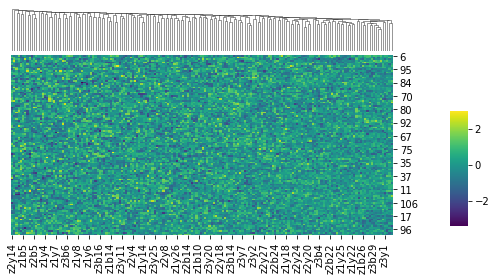

In [70]:
df = pd.DataFrame(data = model.decoder.trans_decoder_embedding.weight.detach().numpy().T)
df.columns = list(EFC.FRAG_EMBEDING_LABELS)

for x in df:
    if sum(df[x]**2) < 0.01:
        del df[x]

g = sns.clustermap(df, cmap="viridis", dendrogram_ratio=(0.02, 0.2), figsize=(8,4))
g.ax_row_dendrogram.set_visible(False)
g.fig.subplots_adjust(right=0.7)
g.ax_cbar.set_position((0.8, .2, .03, .4))